In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Ride_df=pd.read_csv("rideshare_pricing_data.csv")

In [3]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,40.874540,-74.126359,41.229998,-73.861855,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994
1,41.450714,-74.167088,40.684512,-74.040708,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458
2,41.231994,-74.323846,40.846640,-73.535501,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709
3,41.098658,-73.892733,41.163281,-74.281022,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554
4,40.656019,-74.023376,40.982089,-73.912144,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,-73.622961,41.452275,-73.745966,2.922119,23,12,0,22.132327,0,9.083888,0,15.899768
9996,41.397509,-74.453186,41.247824,-73.735473,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197
9997,41.446708,-74.196302,40.519456,-74.230431,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226
9998,40.897488,-74.056680,40.901005,-74.065680,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045


In [4]:
Ride_df.dropna(inplace=True)

In [5]:
Ride_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8557 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_latitude    8557 non-null   float64
 1   pickup_longitude   8557 non-null   float64
 2   dropoff_latitude   8557 non-null   float64
 3   dropoff_longitude  8557 non-null   float64
 4   distance           8557 non-null   float64
 5   drivers_available  8557 non-null   int64  
 6   ride_requests      8557 non-null   int64  
 7   peak_hour          8557 non-null   int64  
 8   temperature        8557 non-null   float64
 9   precipitation      8557 non-null   int64  
 10  visibility         8557 non-null   float64
 11  event_nearby       8557 non-null   int64  
 12  price              8557 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 935.9 KB


In [6]:
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Apply the haversine function to your dataset
Ride_df['calculated_distance'] = Ride_df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)



In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Ride_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']] = scaler.fit_transform(Ride_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

In [8]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,calculated_distance
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.322868
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.854027
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.788455
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.304642
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.446118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.213341
9996,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.202528
9997,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.145514
9998,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.851554


In [10]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

Ride_df['demand_multiplier'] = np.where(Ride_df['ride_requests'] > np.percentile(Ride_df['ride_requests'], high_demand_percentile),
                                     Ride_df['ride_requests'] / np.percentile(Ride_df['ride_requests'], high_demand_percentile),
                                     Ride_df['ride_requests'] / np.percentile(Ride_df['ride_requests'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

Ride_df['supply_multiplier'] = np.where(Ride_df['drivers_available'] > np.percentile(Ride_df['drivers_available'], low_supply_percentile),
                                     np.percentile(Ride_df['drivers_available'], high_supply_percentile) / Ride_df['drivers_available'],
                                     np.percentile(Ride_df['drivers_available'], low_supply_percentile) / Ride_df['drivers_available'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
Ride_df['adjusted_ride_cost'] = Ride_df['price'] * (
    np.maximum(Ride_df['demand_multiplier'], demand_threshold_low) *
    np.maximum(Ride_df['supply_multiplier'], supply_threshold_high)
)

In [11]:
Ride_df['profit_percentage'] = ((Ride_df['adjusted_ride_cost'] - Ride_df['price']) / Ride_df['price']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = Ride_df[Ride_df['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = Ride_df[Ride_df['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]



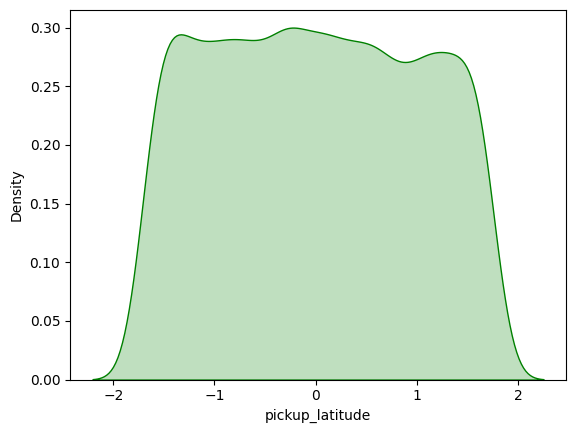

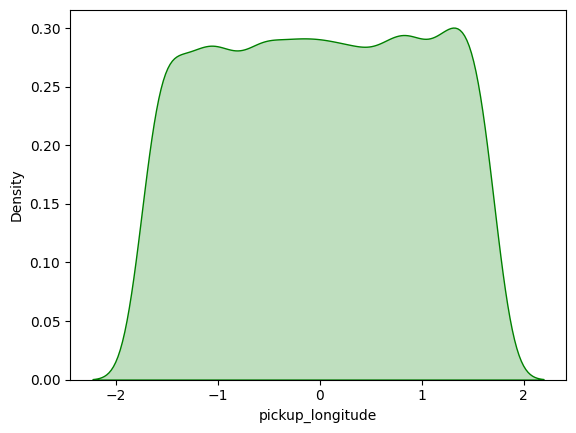

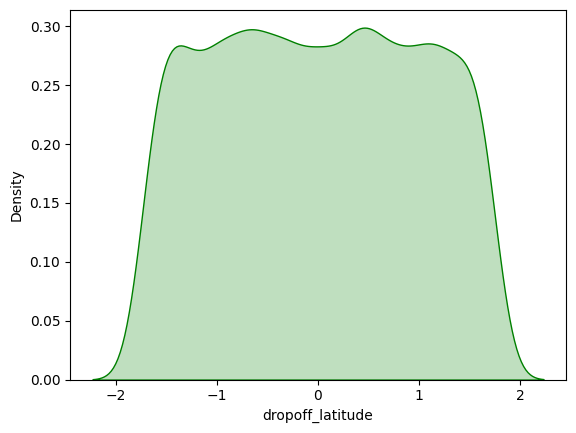

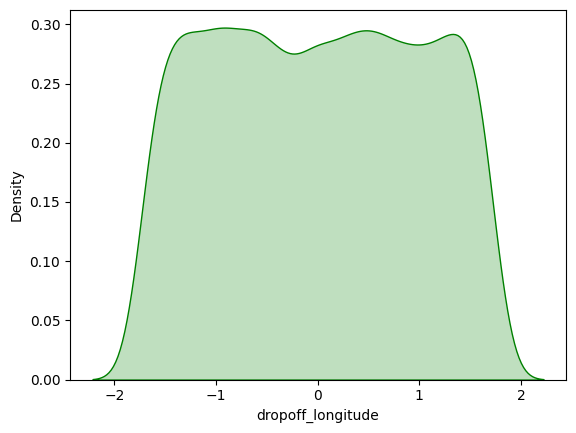

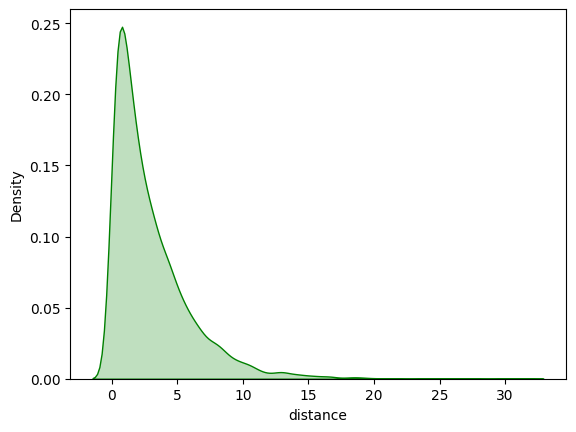

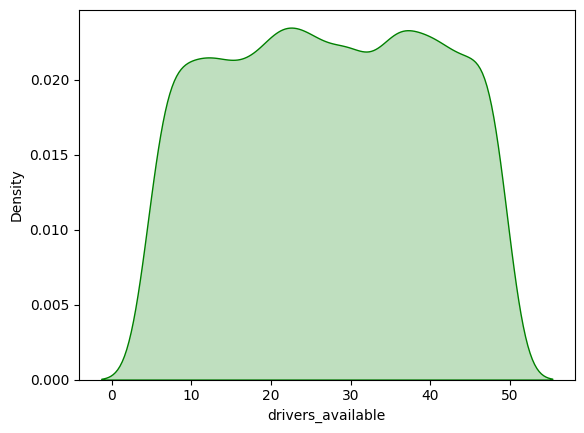

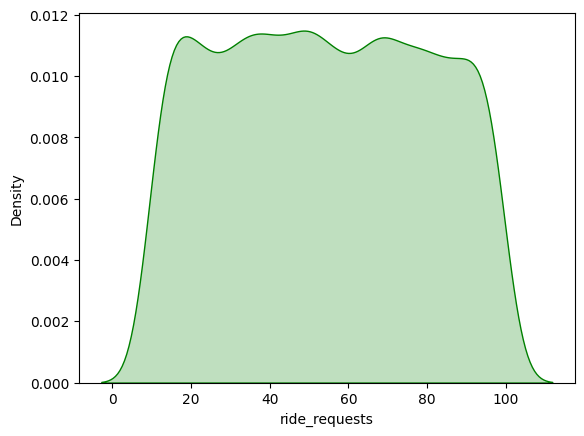

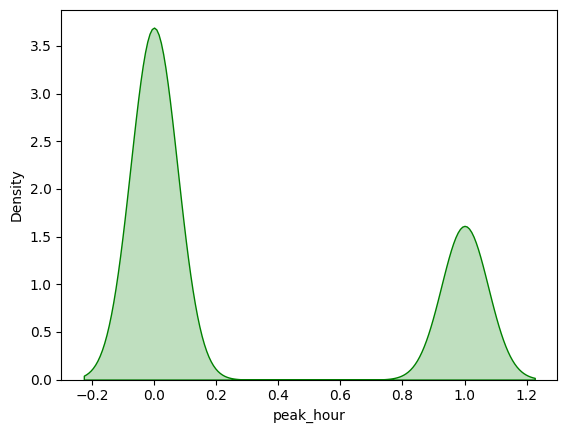

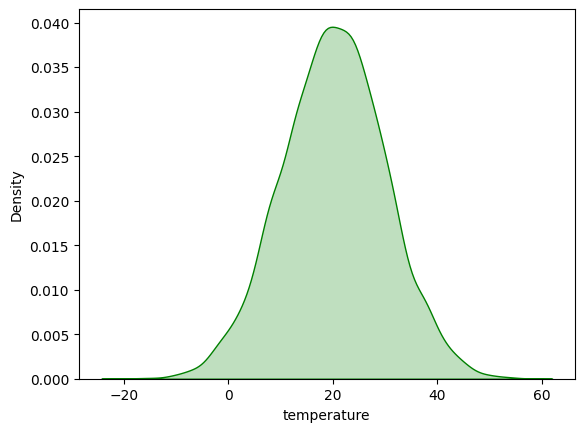

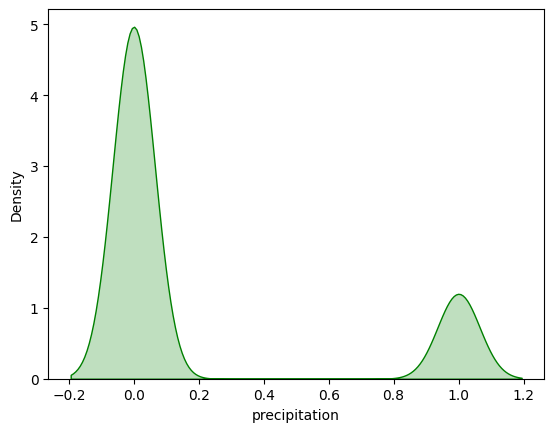

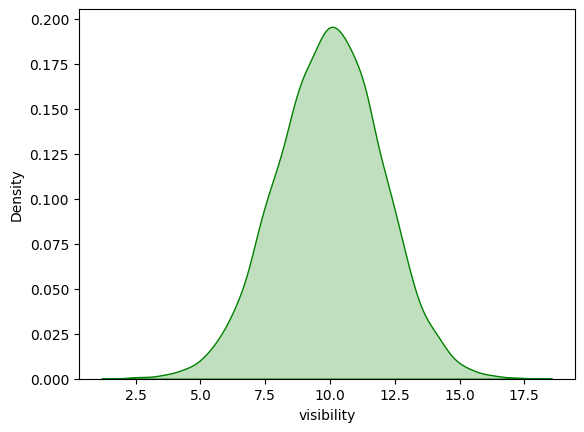

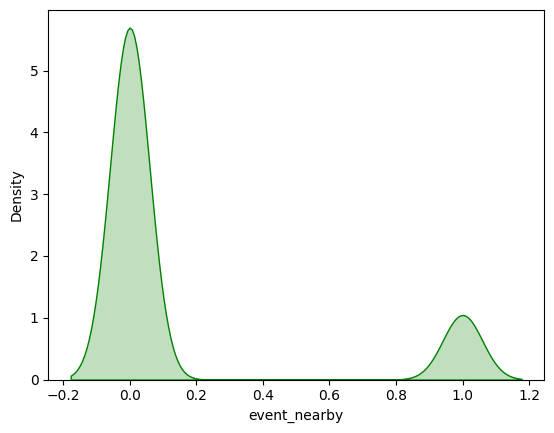

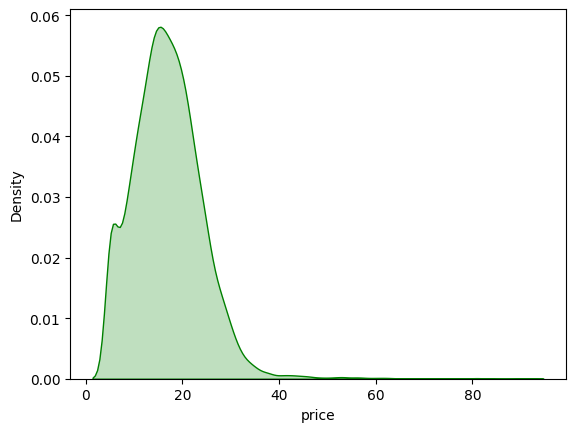

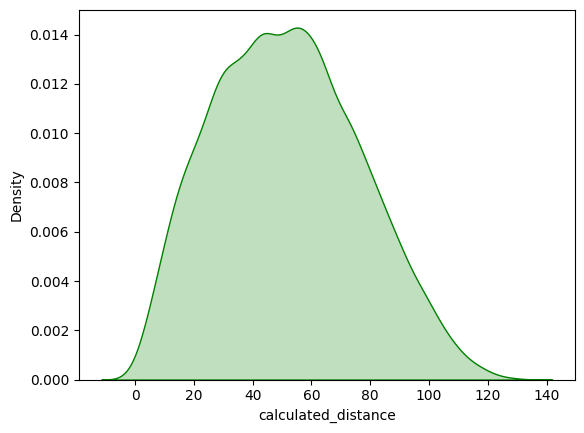

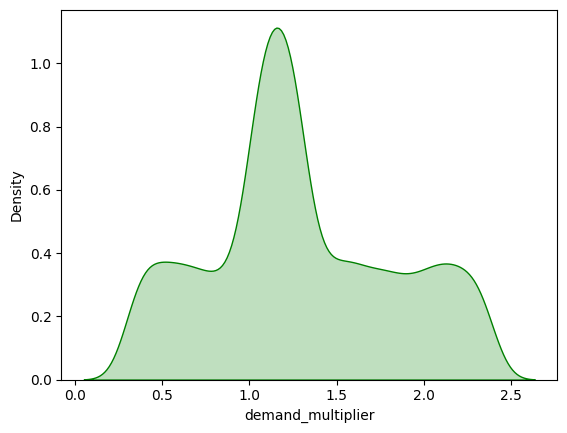

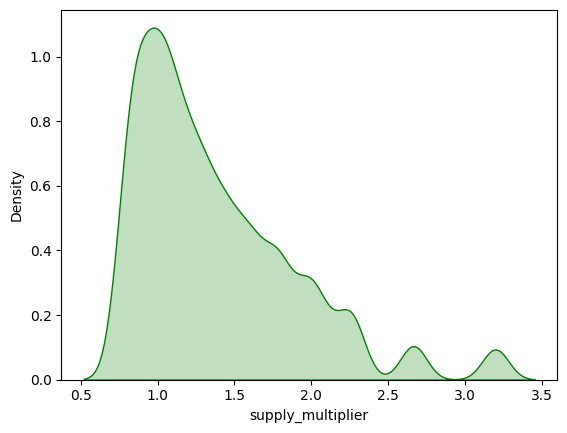

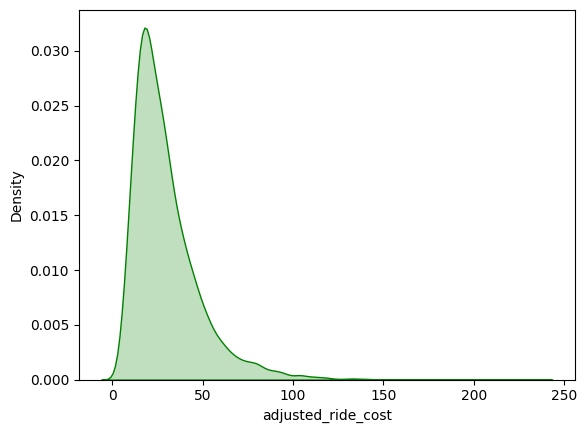

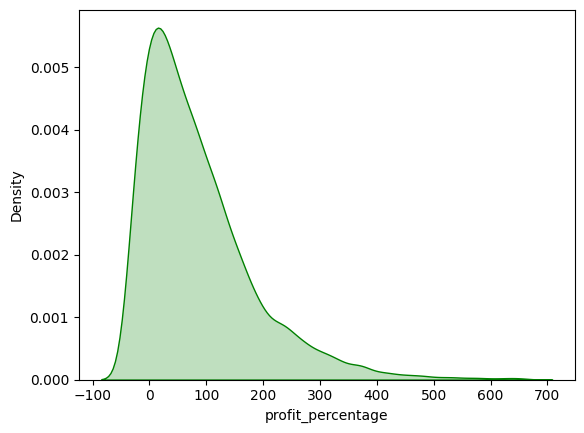

In [13]:
for i in Ride_df.columns:
    if Ride_df[i].dtype != 'object' :
        sns.kdeplot(Ride_df[i],fill=True,color="g"), "warn_Singular=false"
        plt.show()

pickup_latitude


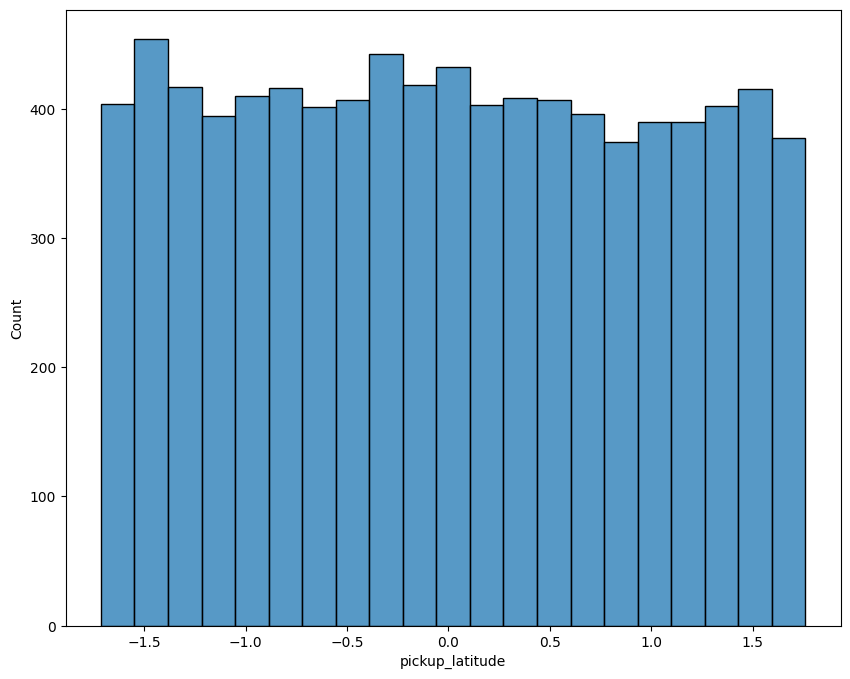

pickup_longitude


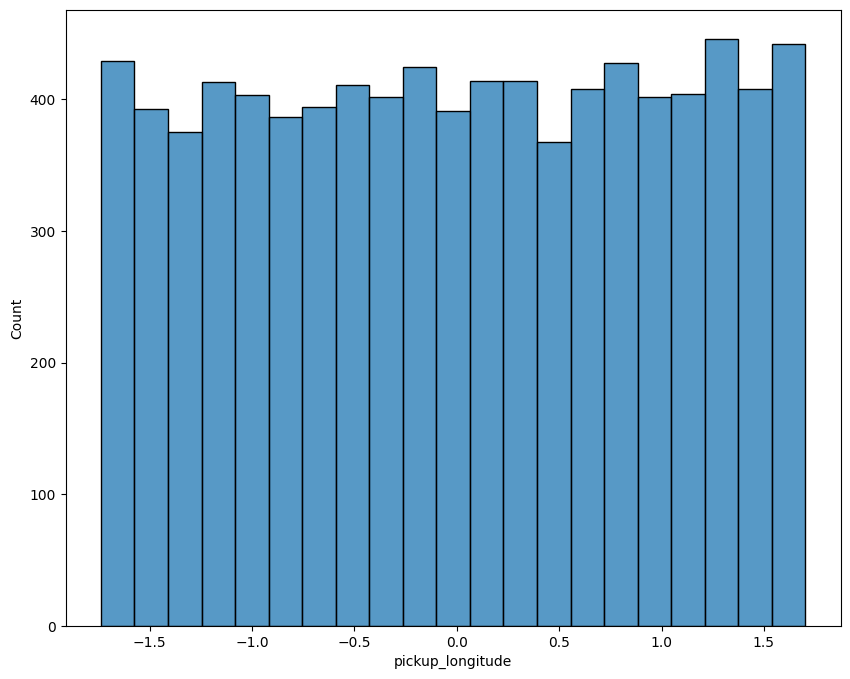

dropoff_latitude


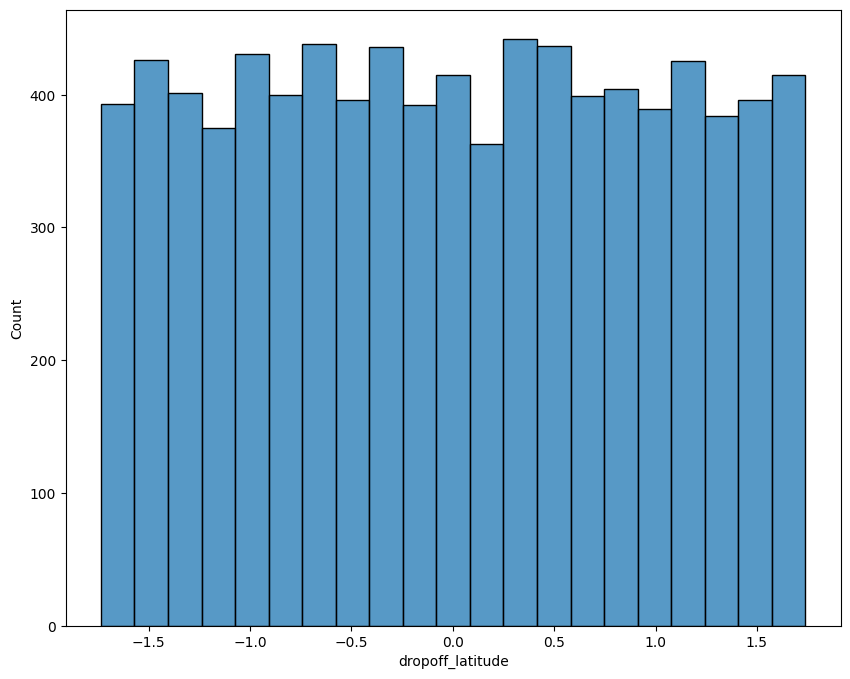

dropoff_longitude


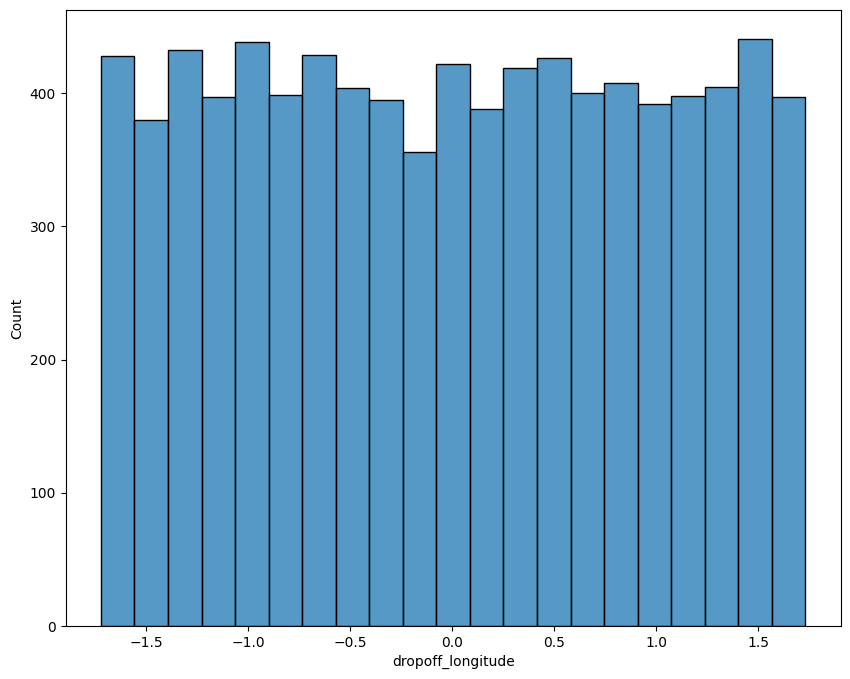

distance


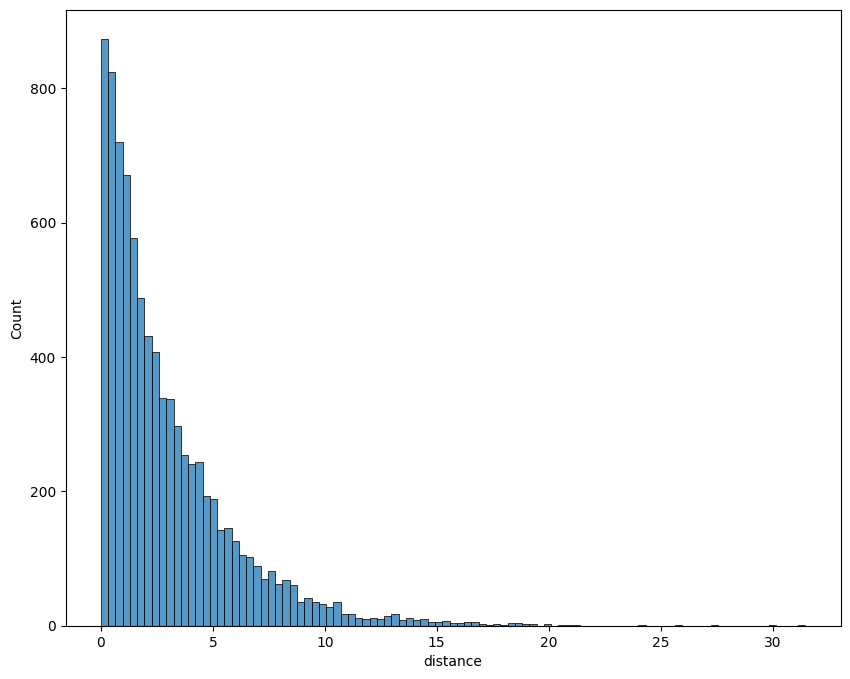

drivers_available


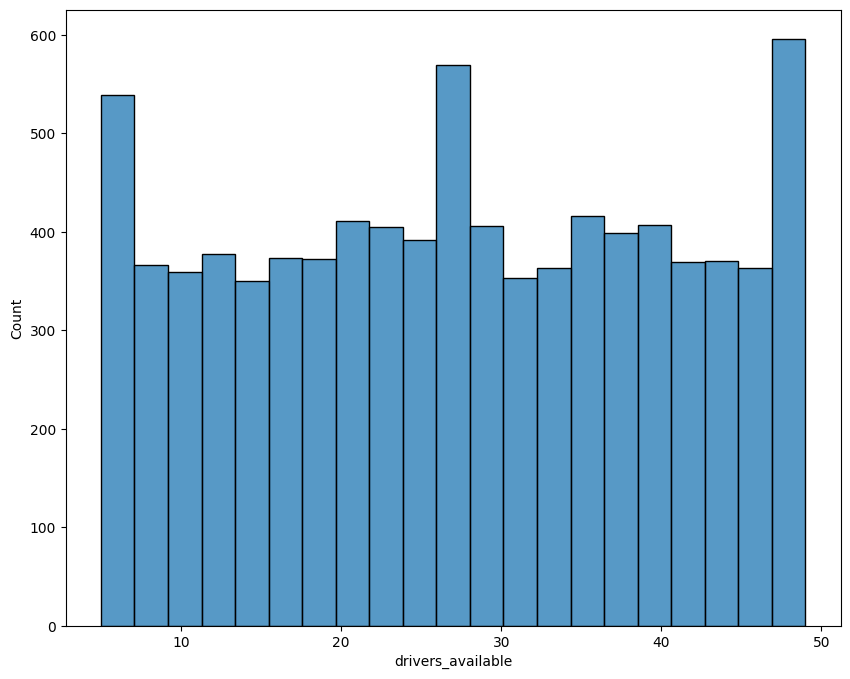

ride_requests


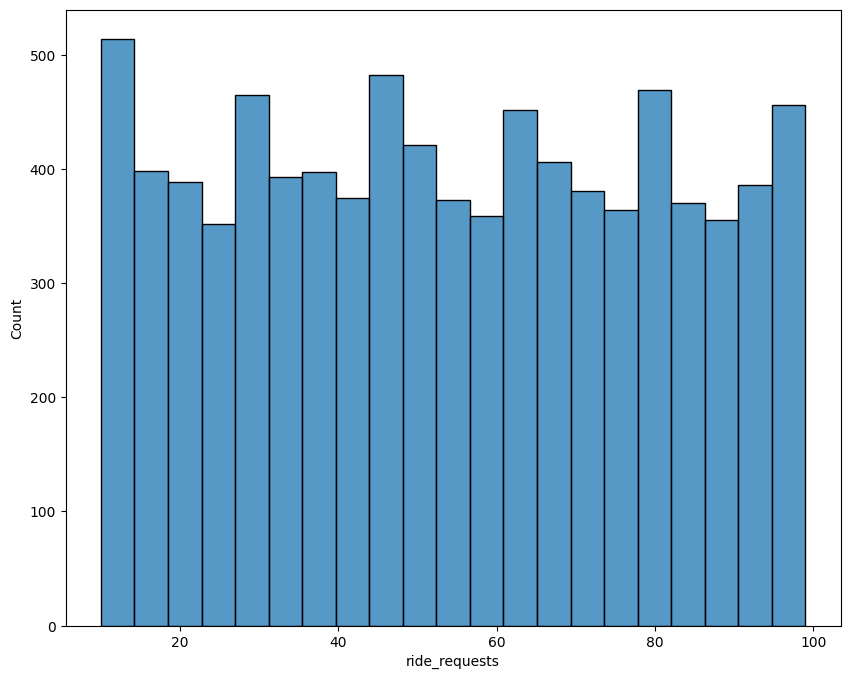

peak_hour


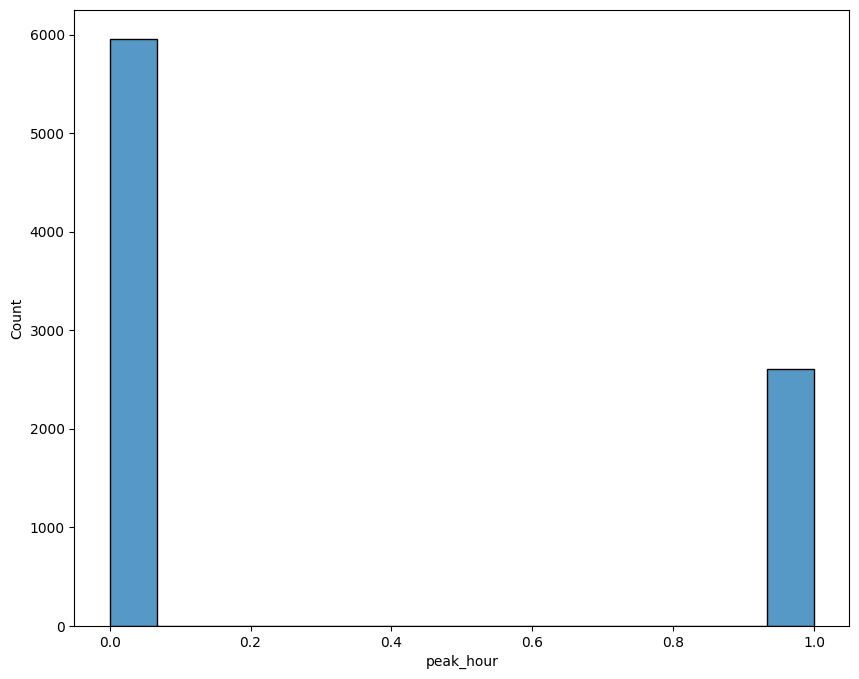

temperature


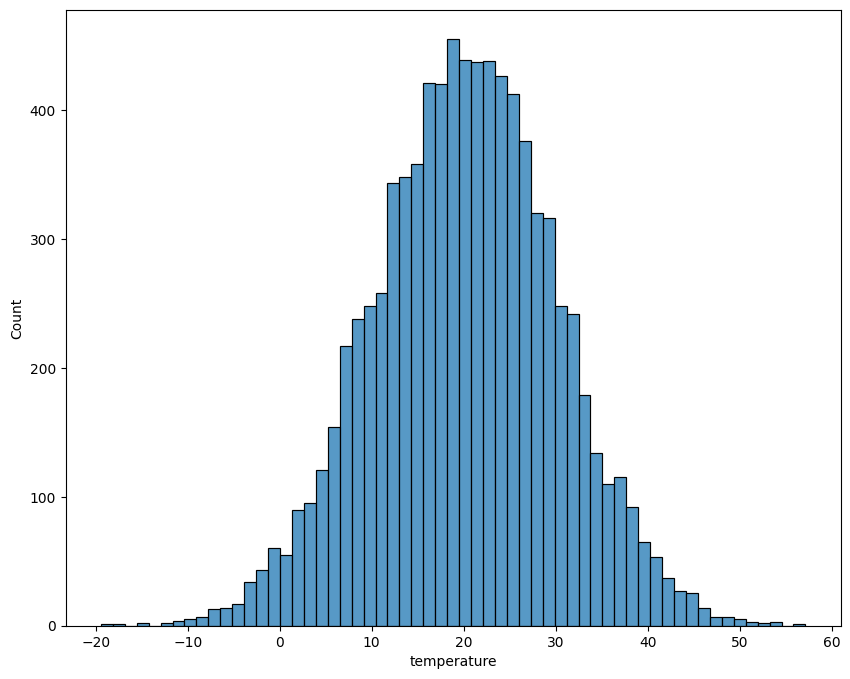

precipitation


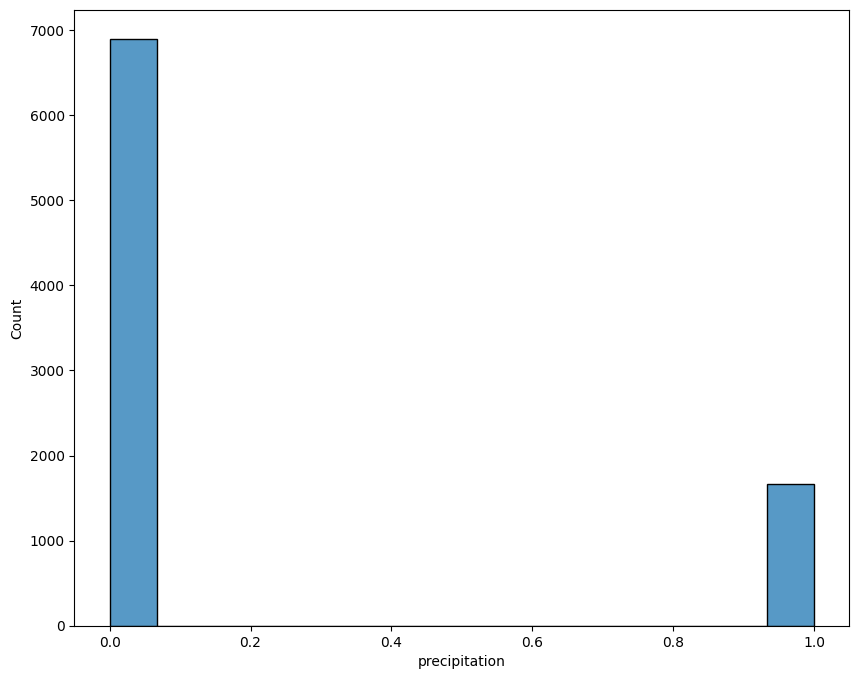

visibility


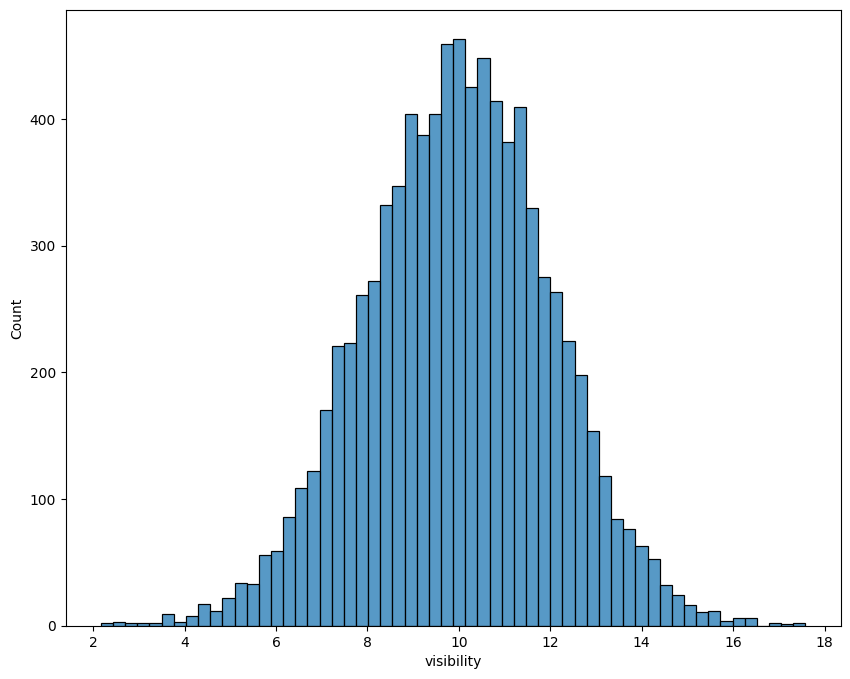

event_nearby


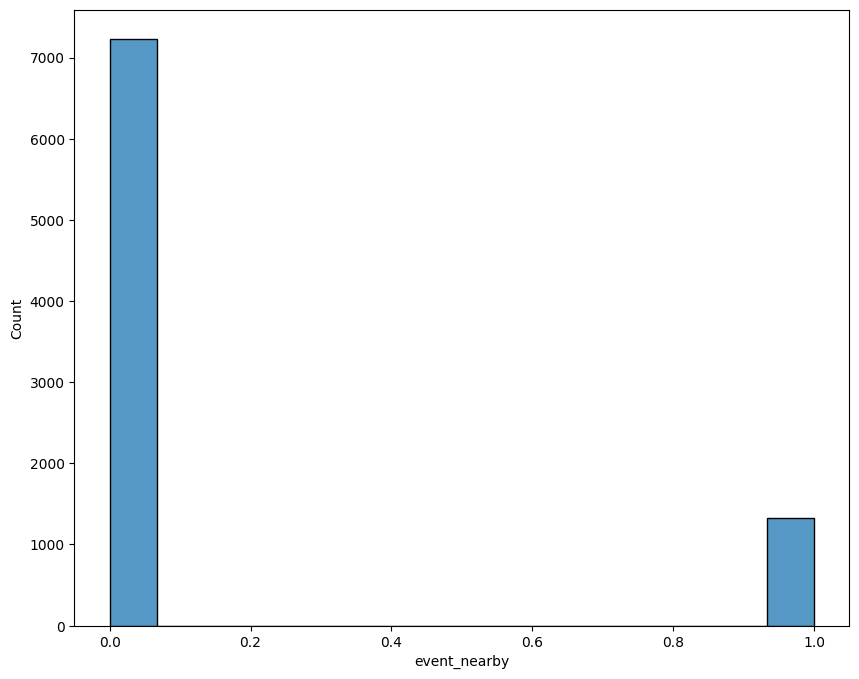

price


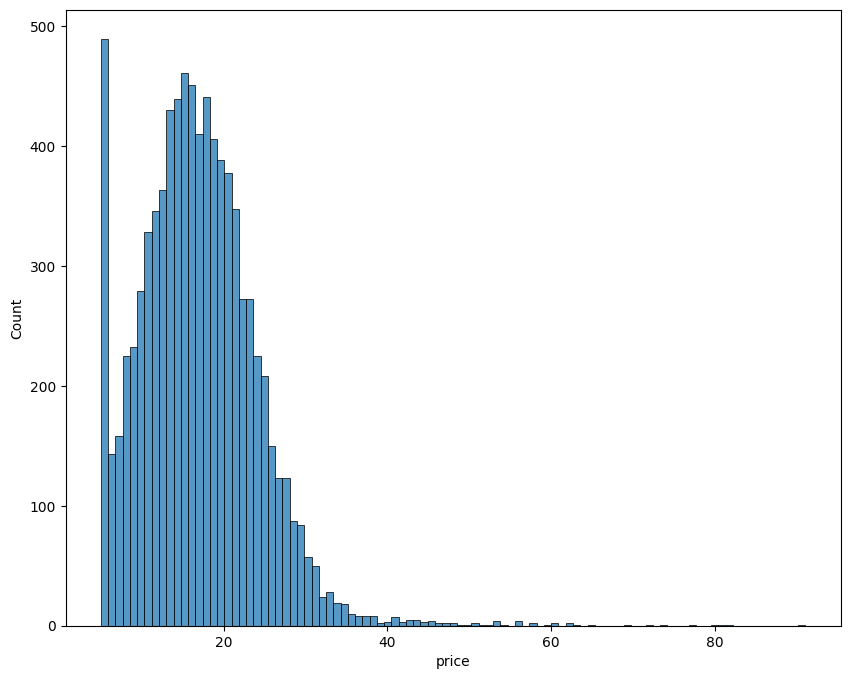

calculated_distance


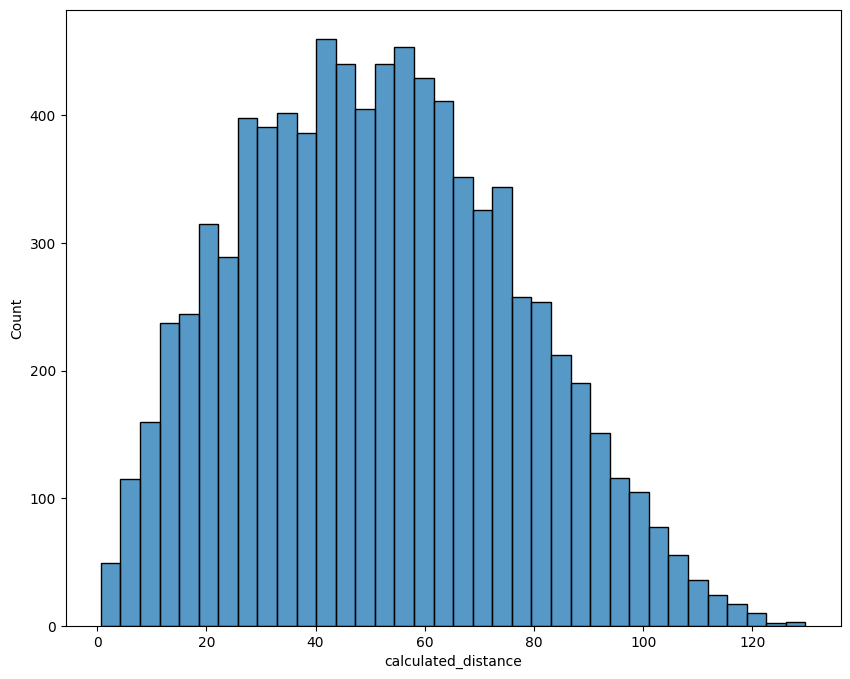

demand_multiplier


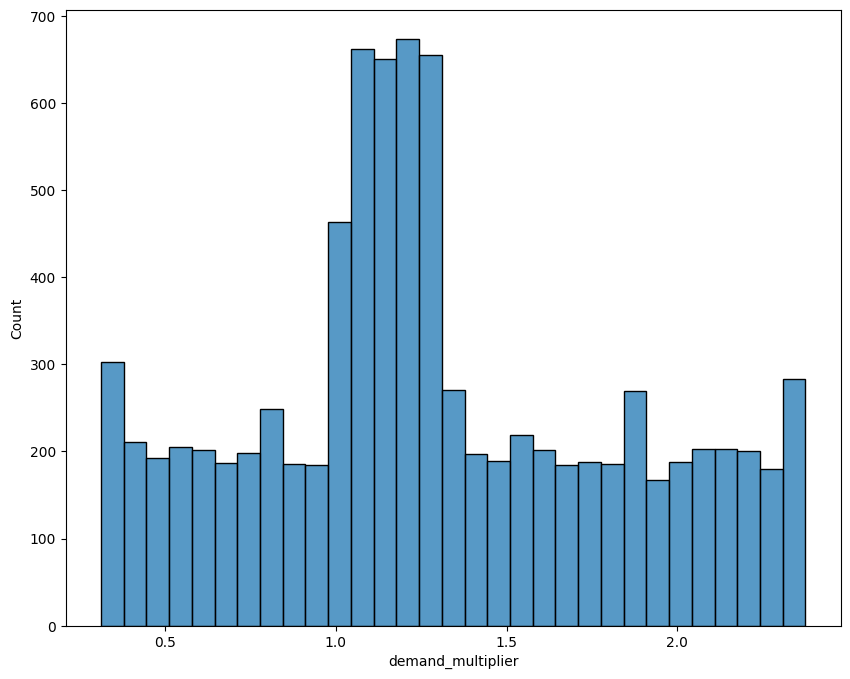

supply_multiplier


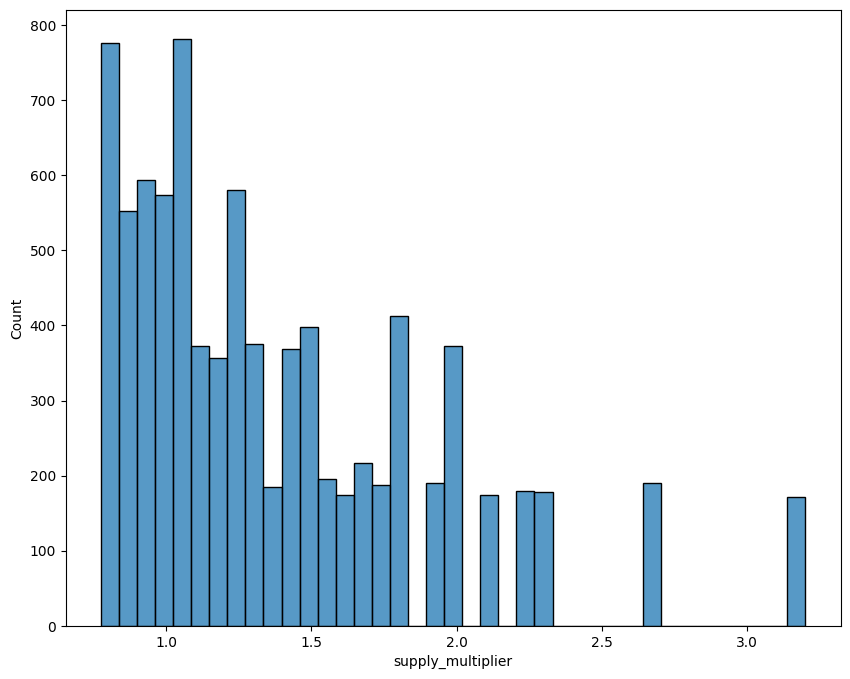

adjusted_ride_cost


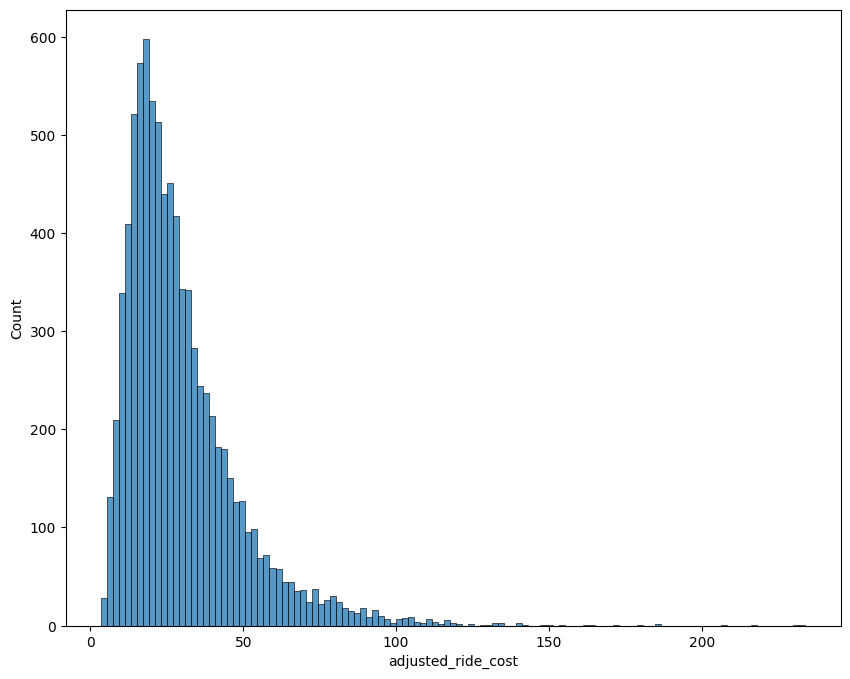

profit_percentage


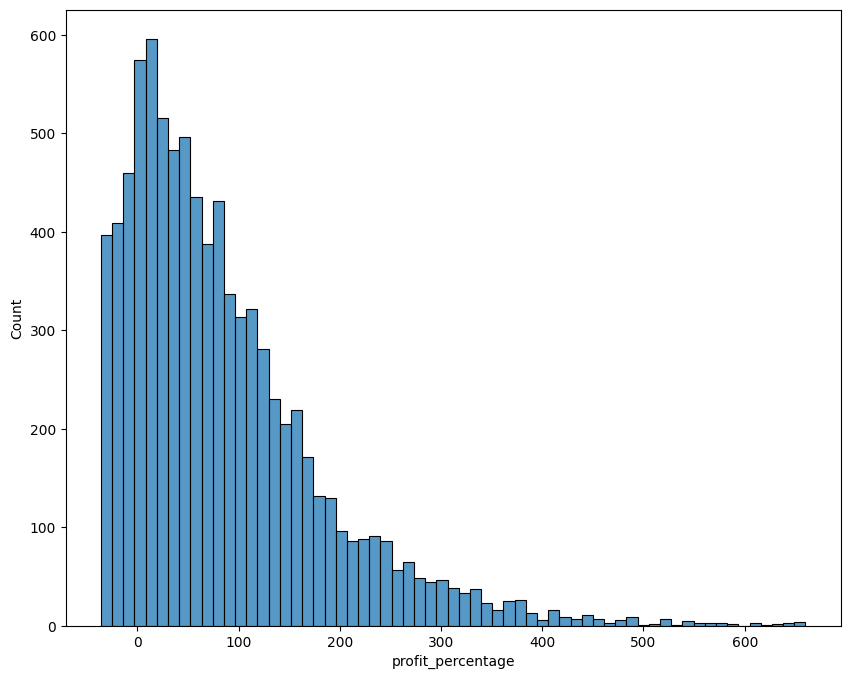

In [14]:
for i in Ride_df.columns:
    if Ride_df[i].dtype !="object":
       print(i)
       plt.figure(figsize=(10,8))
       sns.histplot(Ride_df[i])
       plt.show()

In [19]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,calculated_distance,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.322868,1.437500,1.230769,46.019451,76.923077
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.854027,2.000000,0.950000,29.640869,90.000000
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.788455,0.968750,1.600000,16.672899,55.000000
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.304642,1.281250,1.357143,36.615701,73.883929
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.446118,1.656250,1.266667,49.615069,109.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.213341,2.375000,0.826087,52.210248,96.195652
9996,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.202528,1.302632,1.000000,14.178099,30.263158
9997,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.145514,2.343750,1.142857,51.217570,167.857143
9998,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.851554,1.131579,1.000000,14.699262,13.157895


In [20]:
from sklearn.model_selection import train_test_split
X = Ride_df.drop('adjusted_ride_cost', axis=1)
y = Ride_df['adjusted_ride_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 46.40491962682939
R-squared: 0.8810257493243093


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
features = Ride_df.drop(['adjusted_ride_cost'], axis = 1)
target = Ride_df['adjusted_ride_cost']
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [24]:
model.feature_importances_

array([7.02806499e-04, 6.39885585e-04, 5.86471953e-04, 3.88048316e-04,
       9.71097622e-04, 3.76054222e-04, 6.52349084e-04, 1.10037585e-04,
       1.44970273e-03, 1.42922176e-04, 6.55274660e-04, 7.35972338e-05,
       4.66061597e-01, 9.93802269e-04, 4.10162664e-04, 2.56116959e-04,
       5.25530074e-01])

In [27]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)
feature_importance

,column,Score
17,adjusted_ride_cost,99.903781
4,distance,0.042432
13,pickup_grid,0.010876
2,dropoff_latitude,0.010794
3,dropoff_longitude,0.004758
8,temperature,0.003974
5,drivers_available,0.003827
12,calculated_distance,0.003316
14,dropoff_grid,0.002898
16,supply_multiplier,0.002876


In [25]:
x = Ride_df.drop(['price'],axis = 1)
y = Ride_df['adjusted_ride_cost']
print(x.shape)
x

(8557, 17)


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,calculated_distance,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,45.322868,1.437500,1.230769,46.019451,76.923077
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,85.854027,2.000000,0.950000,29.640869,90.000000
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,78.788455,0.968750,1.600000,16.672899,55.000000
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,33.304642,1.281250,1.357143,36.615701,73.883929
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,37.446118,1.656250,1.266667,49.615069,109.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,16.213341,2.375000,0.826087,52.210248,96.195652
9996,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,62.202528,1.302632,1.000000,14.178099,30.263158
9997,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,103.145514,2.343750,1.142857,51.217570,167.857143
9998,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,0.851554,1.131579,1.000000,14.699262,13.157895


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6845, 17), (1712, 17), (6845,), (1712,))

In [29]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [30]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.03154317706621851
0.07133444742495613
0.9985225809366828
0.9946585797485868


In [31]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.06517640959962956
0.10834591529278113
0.998159198040409
0.9953178430676328


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [34]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.24726558205980592
0.2530054459526784
0.9996754777825215
0.9994254153882153


In [35]:
import pickle

with open('DecisionTree_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [36]:
Ride_df.to_csv("New_Ride", index=False)

In [37]:
df=pd.read_csv('New_Ride')

In [38]:
df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,calculated_distance,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.322868,1.437500,1.230769,46.019451,76.923077
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.854027,2.000000,0.950000,29.640869,90.000000
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.788455,0.968750,1.600000,16.672899,55.000000
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.304642,1.281250,1.357143,36.615701,73.883929
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.446118,1.656250,1.266667,49.615069,109.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.213341,2.375000,0.826087,52.210248,96.195652
8553,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.202528,1.302632,1.000000,14.178099,30.263158
8554,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.145514,2.343750,1.142857,51.217570,167.857143
8555,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.851554,1.131579,1.000000,14.699262,13.157895
